In [2]:
# CELL1 – 1 mark


################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
################################################################################################################################
hdf = pd.read_table('2017Health.txt', index_col=['County'])
hdf = hdf[['Years of Potential Life Lost Rate', 'Teen Birth Rate', 'Violent Crime Rate', 'Percentage Smokers']]
hdf





Populating the interactive namespace from numpy and matplotlib


,Years of Potential Life Lost Rate,Teen Birth Rate,Violent Crime Rate,Percentage Smokers
County,,,,
Alachua,6633,19,579,16
Baker,8270,58,360,19
Bay,9168,50,508,18
Bradford,10346,61,461,18
Brevard,7722,25,518,16
...,...,...,...,...
Taylor,7875,64,743,18
Volusia,8295,32,426,16
Wakulla,7548,31,272,17


In [3]:
# CELL2 – 5 marks
psd = hdf['Percentage Smokers'].values

PS = hdf['Percentage Smokers'].values
PS_mean = mean(PS)
PS_error = 1.96*std(PS)/sqrt(len(PS))

print('Mean of smokers =', round(mean(psd),2))
print('Minimum of percentage smokers =', round(min(psd),2))
print('Maximum of percentage smokers =', round(max(psd),2))
print('Standard deviation of percentage smokers =', round(std(psd),2))
print('95% confidence interval of percentage smokers =', [round(PS_mean - PS_error), round(PS_mean + PS_error)])





Mean of smokers = 16.92
Minimum of percentage smokers = 11
Maximum of percentage smokers = 21
Standard deviation of percentage smokers = 2.37
95% confidence interval of percentage smokers = [16.0, 17.0]


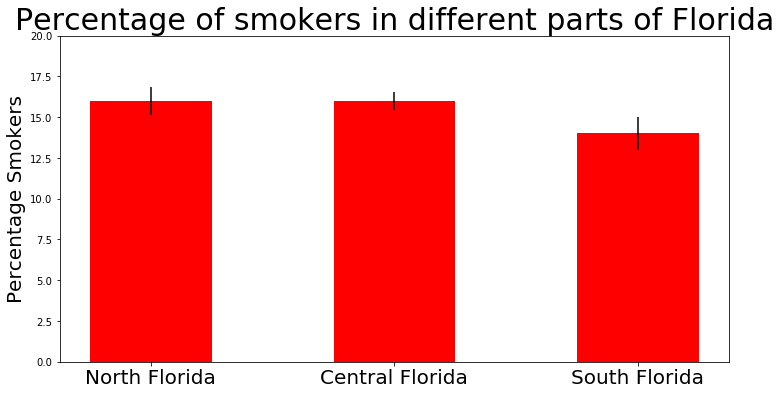

In [4]:
# CELL3 – 6 marks
#define different regions
smokers = hdf['Percentage Smokers']
NF = [smokers['Duval'], smokers['Alachua'], smokers['Leon'], smokers['Flagler'], smokers['Marion']]
CF = [smokers['Orange'], smokers['Polk'], smokers['Hillsborough'], smokers['Pinellas'], smokers['Brevard']]
SF = [smokers['Miami-Dade'], smokers['Broward'], smokers['Lee'], smokers['Palm Beach'], smokers['Sarasota']]

#calculate means
NF_mean = round(mean(NF))
CF_mean = round(mean(CF))
SF_mean = round(mean(SF))

#calculate errors
NF_error = 1.96*std(NF)/sqrt(len(NF))
CF_error = 1.96*std(CF)/sqrt(len(CF))
SF_error = 1.96*std(SF)/sqrt(len(SF))

#draw figure
figure(figsize(12,6))
N = 3
ind = arange(N)
width = 0.5
bar(ind, [NF_mean, CF_mean, SF_mean], width, color='r', yerr=[NF_error, CF_error, SF_error] )
ylabel('Percentage Smokers', fontsize=20)
xtickloc = ind
xticklabel = ['North Florida', 'Central Florida', 'South Florida']
xticks(xtickloc, xticklabel, rotation='horizontal', fontsize=20)
title('Percentage of smokers in different parts of Florida', fontsize=30)
ylim([0, 20])
show()



Slope= 0.11
Intercept= 12.41


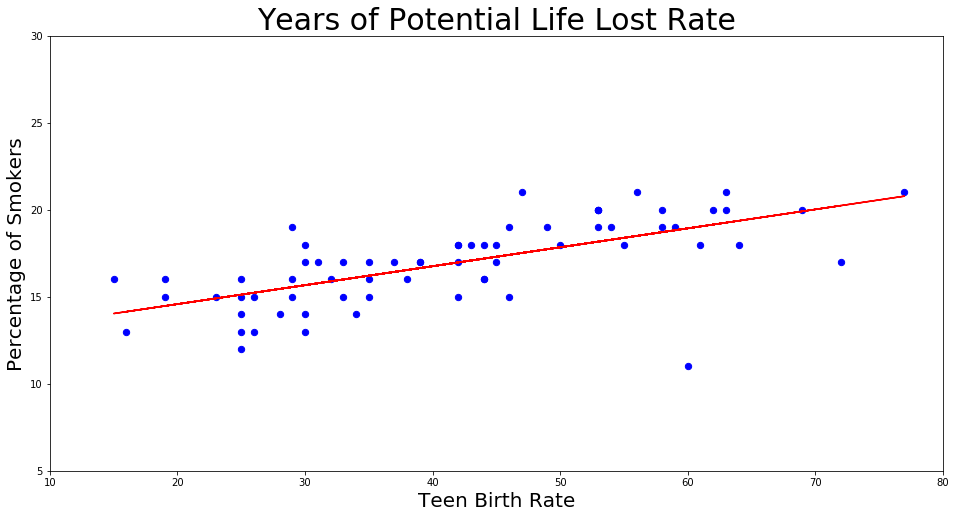

y = 0.1 x +  12.4


In [5]:
# CELL4 – 2 marks

Teen_Birth_Rate = hdf['Teen Birth Rate']


figure(figsize=(16,8))
xlabel('Teen Birth Rate', fontsize=20)
ylabel('Percentage of Smokers', fontsize=20)
title('Years of Potential Life Lost Rate', fontsize=30)

scatter(Teen_Birth_Rate, smokers, s=40, c='b', marker='o', edgecolors=None)

line = stats.linregress(Teen_Birth_Rate, smokers)[0]*Teen_Birth_Rate+stats.linregress(Teen_Birth_Rate, smokers)[1]
plot(Teen_Birth_Rate, line, 'r-', label='solid')
xlim([10,80])
ylim([5,30])
print('Slope=', round(stats.linregress(Teen_Birth_Rate, smokers)[0],2))
print('Intercept=', round(stats.linregress(Teen_Birth_Rate, smokers)[1],2))
show()
print('y =', round(stats.linregress(Teen_Birth_Rate, smokers)[0],1), 'x + ', round(stats.linregress(Teen_Birth_Rate, smokers)[1],1 ) )




In [6]:
# CELL5 – 6 marks
VCR = hdf['Violent Crime Rate']
YPLLR = hdf['Years of Potential Life Lost Rate']
Model_A = 60.6*Teen_Birth_Rate + 5297.6
Model_B = 1.36*VCR + 7254.3

Error_A = YPLLR - Model_A
Error_B = YPLLR - Model_B
print('Mean Absolute Error of Model A =',round(mean(abs(Error_A))))
print('Mean Absolute Error of Model B =',round(mean(abs(Error_B))))
print('Model A normality test:', stats.shapiro(Model_A)[1]>0.05)
print('Model B normality test:', stats.shapiro(Model_B)[1]>0.05)
print('Significance test:', stats.mannwhitneyu(Model_A,Model_B))

print('Because the P value is above 0.05 it means that we can reject the null hypothesis, meaning that model B is better at predicting the years of potential life lost rate')



Mean Absolute Error of Model A = 948.0
Mean Absolute Error of Model B = 1219.0
Model A normality test: True
Model B normality test: False
Significance test: MannwhitneyuResult(statistic=2078.0, pvalue=0.3253163381706375)
Because the P value is above 0.05 it means that we can reject the null hypothesis, meaning that model B is better at predicting the years of potential life lost rate
